<a href="https://colab.research.google.com/github/midhunkrishnam/YBI-Foundation-Data-Science-Internship/blob/main/FinalProject_MielagePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mileage Prediction -Regression Analysis**

**source :**

This dataset was taken from the Stattib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**Data Set Information:**

This dataset is a slightly modified version of the dataset grovided in the StatLib library, in line with the use by Ross Quinlan (1993) in predicting the attribute 'mpg", 8 of the original instances were removed because they had unknown values for the 'mpg" attribute. The original dataset is available in the file "auto-mpg data-original

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in teritis of a multivalued discrete and 5 continuous attributes" (Quinlan, 1997)

**Attribute Information:**

1. mpg. continuous

2. cylinders: multi-valued discrete

3. displacement continuous

4. horsepower continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin multi-valued discrete

9. car name string (unique for each instance)

**Import Library**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [3]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**Data Preprocessing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Removing Missing Values**

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

Distribution of the target variable (mpg)

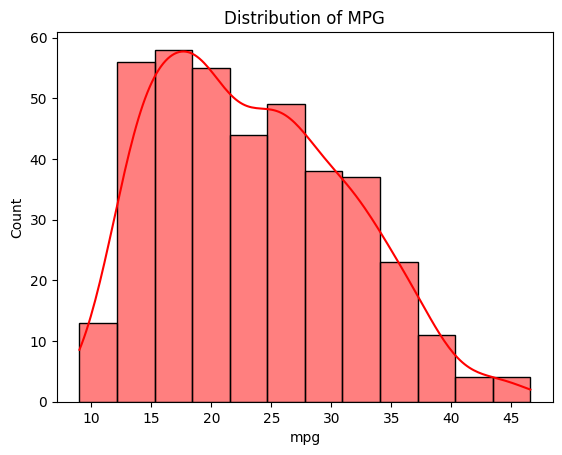

In [88]:
sns.histplot(df['mpg'], kde=True,color = 'red')
plt.title('Distribution of MPG')
plt.show()

Pairplot of selected features

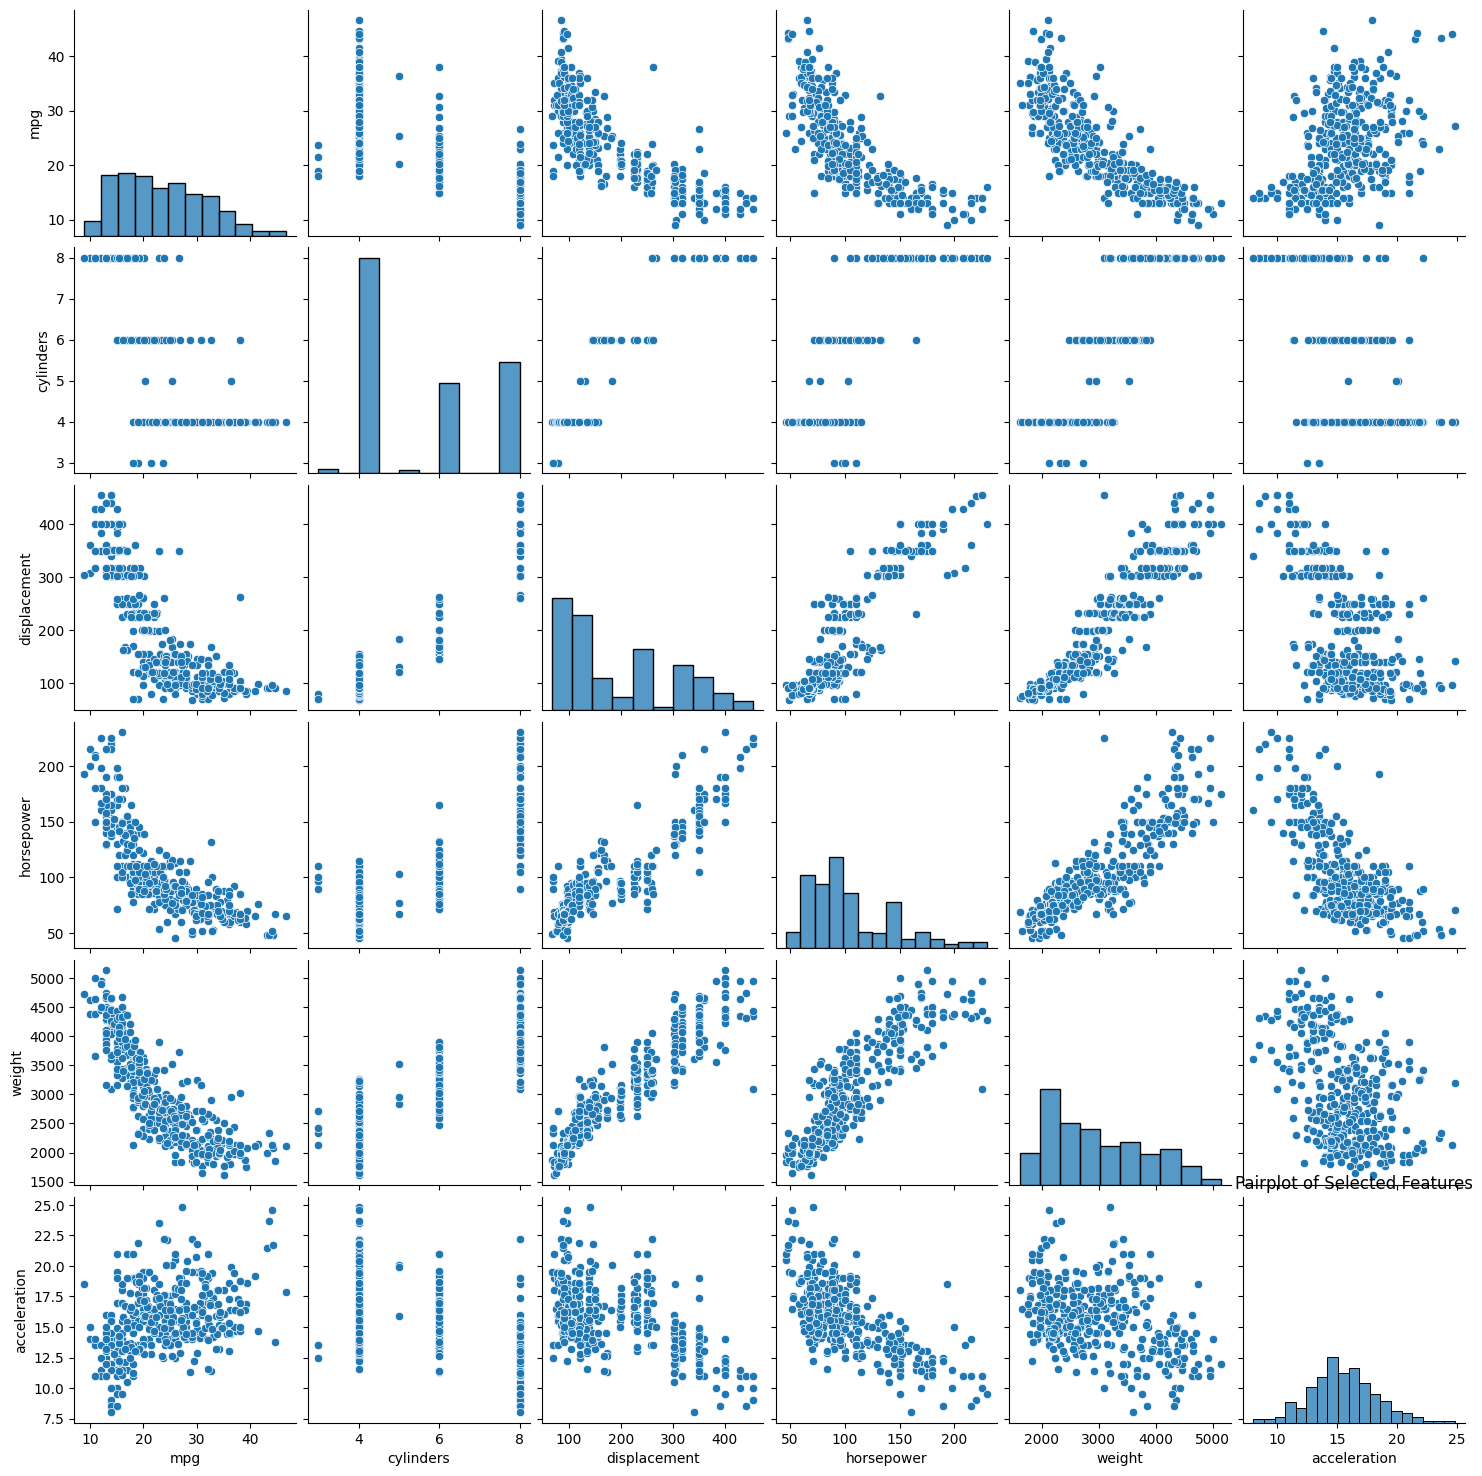

In [19]:
# Pairplot of selected features
sns.pairplot(df, vars=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'])
plt.title('Pairplot of Selected Features')
plt.show()

Scatter plot of Horsepower vs. MPG

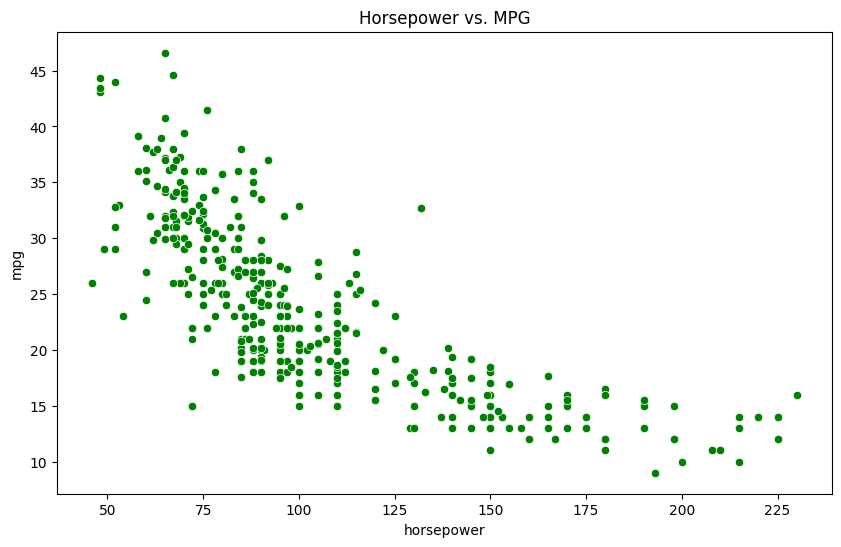

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df,color = 'green')
plt.title('Horsepower vs. MPG')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

Boxplot of MPG by Number of Cylinders

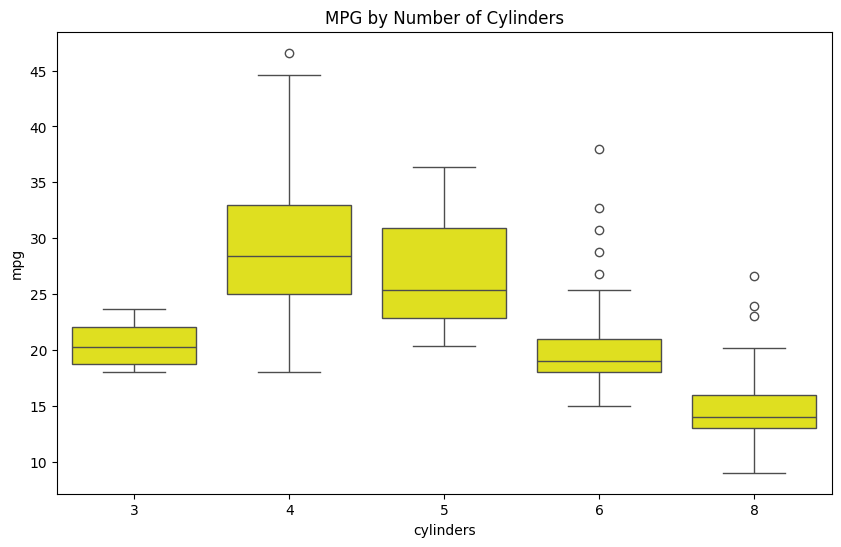

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='mpg', data=df,color = 'yellow')
plt.title('MPG by Number of Cylinders')
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.show()

**Define Targeet Variable y and Feature x**

In [22]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [23]:
y = df['mpg']

In [25]:
x = df[['cylinders','horsepower','weight','acceleration']]

In [26]:
x.shape

(392, 4)

In [27]:
x

,cylinders,horsepower,weight,acceleration
0,8,130.0,3504,12.0
1,8,165.0,3693,11.5
2,8,150.0,3436,11.0
3,8,150.0,3433,12.0
4,8,140.0,3449,10.5
...,...,...,...,...
393,4,86.0,2790,15.6
394,4,52.0,2130,24.6
395,4,84.0,2295,11.6
396,4,79.0,2625,18.6


**Scaling Data**

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[ 1.48394702,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48394702,  1.57459447,  0.84333403, -1.46672362],
       [ 1.48394702,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.86401356, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.86401356, -0.66254009, -0.41562716,  1.11008813],
       [-0.86401356, -0.58450051, -0.30364091,  1.40043312]])

In [29]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.087565e-16,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.451004e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.640136e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-8.640136e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,1.483947e+00,5.600800e-01,7.510927e-01,5.384714e-01
max,1.483947e+00,3.265452e+00,2.549061e+00,3.360262e+00


After standardization Mean is 0 and standard Deviation is 1

**Train Test Split Data**

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2529)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Model**

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [35]:
lr.intercept_

23.485073801264086

In [36]:
lr.coef_

array([-0.69190012, -1.87953488, -4.30080175, -0.09540162])

**Predict Test Data**

In [38]:
y_pred = lr.predict(x_test)
y_pred

array([18.28943907, 15.20912864, 14.33608568, 23.83133478, 29.72991064,
       23.60404139, 26.5906917 , 24.468035  , 15.13701646, 11.88638462,
       24.32181435, 28.17942358, 31.67835162, 30.85513601, 18.480972  ,
       19.59731663, 28.45649937, 32.1974945 , 31.09710353, 27.36231699,
       18.66386477, 22.74232411, 26.18681981, 32.56259013, 20.77363573,
        9.41902406, 21.51061249, 18.0653811 , 24.94196993, 16.20748134,
       23.36219896, 16.96226572,  9.13285713, 29.88220619, 20.69187304,
       29.14819774, 24.27169329, 21.8234526 , 10.82422585, 13.04887701,
       21.70895251, 19.76739894,  6.71768696, 17.54385857, 22.74417916,
       29.34987757, 13.40747031, 25.96481118, 29.3040975 , 22.48438241,
       22.43254945, 16.71371811, 23.63933458, 30.11739445, 10.41146963,
        9.93713272, 28.43832291, 23.98232276, 20.33429465, 30.71785573,
       20.9068114 , 26.9167443 , 23.29355048, 14.19202866, 24.48818546,
       26.94384875, 15.44095529, 24.06751859, 30.74072795, 14.71

**Model Accuracy**

In [74]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score


In [61]:
mean_absolute_error(y_test,y_pred)

3.3015371468173154

In [62]:
mean_absolute_percentage_error(y_test,y_pred)

0.14519967147391455

In [75]:
r2_score(y_test,y_pred)

0.7068854437424967

**Polynomial Regression**

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
lr.fit(x_train2,y_train)

LinearRegression()

In [77]:
lr.intercept_

21.057035264376918

In [78]:
lr.coef_

array([-0.83122365, -5.07112744, -3.02490141, -0.51826959,  2.19244485,
        0.05880553,  0.43589018,  0.77645896, -0.51499258,  0.68163788])

In [79]:
y_pred_poly = lr.predict(x_test2)

**Model Accuray**

In [80]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [81]:
mean_absolute_error(y_test,y_pred_poly)

2.7189830804435524

In [82]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.1184170573248743

In [83]:
r2_score(y_test,y_pred_poly)

0.7603431158126466